In [212]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import skew
import statsmodels.api as sm
import numpy as np
from scipy import stats

df = pd.read_csv('microwage.csv')

Removing Outliers

In [213]:
cols = ['edyrs', 'expyrs', 'wkwage', 'perwt']

for col in cols:
    quartiles = df[col].quantile([0.20, 0.80])
    q1 = quartiles.loc[0.20]
    q3 = quartiles.loc[0.80]

    low_bound = q1 - 1.5 * (q3 - q1)
    upp_bound = q3 + 1.5 * (q3 - q1)

    df = df[(df[col] >= low_bound) & (df[col] <= upp_bound)]

Normalize data

In [214]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_values = scaler.fit_transform(df)

df = pd.DataFrame(scaled_values, columns=df.columns)

df


,region,statefip,metaread,puma,perwt,age,female,race_nonwhite,edyrs,occ_managprof,occ_techsalad,occ_service,occ_farm,occ_product,occ_operator,occ_service_np,occ_service_broad,industry,expyrs,wkwage
0,1.000000,0.090909,0.552350,0.032197,0.297959,0.041667,0.0,0.0,0.452142,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.020612,0.034790
1,1.000000,0.090909,0.072650,0.048933,0.367347,0.270833,0.0,0.0,0.452142,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.245102,0.197818
2,1.000000,0.090909,0.724359,0.099154,0.889796,0.083333,1.0,0.0,0.576117,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.033673,0.187282
3,1.000000,0.090909,0.798077,0.084980,0.220408,0.479167,1.0,0.0,0.018232,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.489796,0.051830
4,1.000000,0.090909,0.867521,0.023186,0.195918,0.520833,1.0,0.0,0.453054,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.489796,0.657068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214392,0.032258,0.636364,0.598291,0.050337,0.987755,0.208333,0.0,1.0,0.596171,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.151633,0.092192
1214393,0.645161,0.418182,0.944444,0.012938,0.436735,0.645833,0.0,0.0,0.656335,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.566735,0.789295
1214394,0.322581,0.290909,0.170940,0.039947,0.371429,0.125000,0.0,0.0,0.656335,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.056531,0.149657
1214395,0.645161,0.418182,0.076923,0.003862,0.269388,0.812500,0.0,0.0,0.970830,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.659592,0.234691


Handling Skewness

In [215]:
skewed_columns = df.apply(lambda x: skew(x))

skewed_columns = skewed_columns[(skewed_columns > 0.5) | (skewed_columns < -0.5)]

for col in skewed_columns.index:
    if skewed_columns[col] > 0.5:
        df[col] = np.log1p(df[col])
    elif skewed_columns[col] < -0.5:
        df[col] = np.cbrt(df[col])

print("\nAfter Handling Skewness:")
print(df.apply(lambda x: skew(x)))



After Handling Skewness:
region               -0.194350
statefip             -0.008125
metaread              0.330860
puma                  8.307681
perwt                 0.637739
age                  -0.067944
female               -0.053071
race_nonwhite         1.888441
edyrs                -0.064044
occ_managprof         0.807263
occ_techsalad         0.852218
occ_service           1.803953
occ_farm             10.970862
occ_product           2.808172
occ_operator          2.380230
occ_service_np        1.944458
occ_service_broad     1.114497
industry             -1.854320
expyrs                0.012287
wkwage                0.678548
dtype: float64


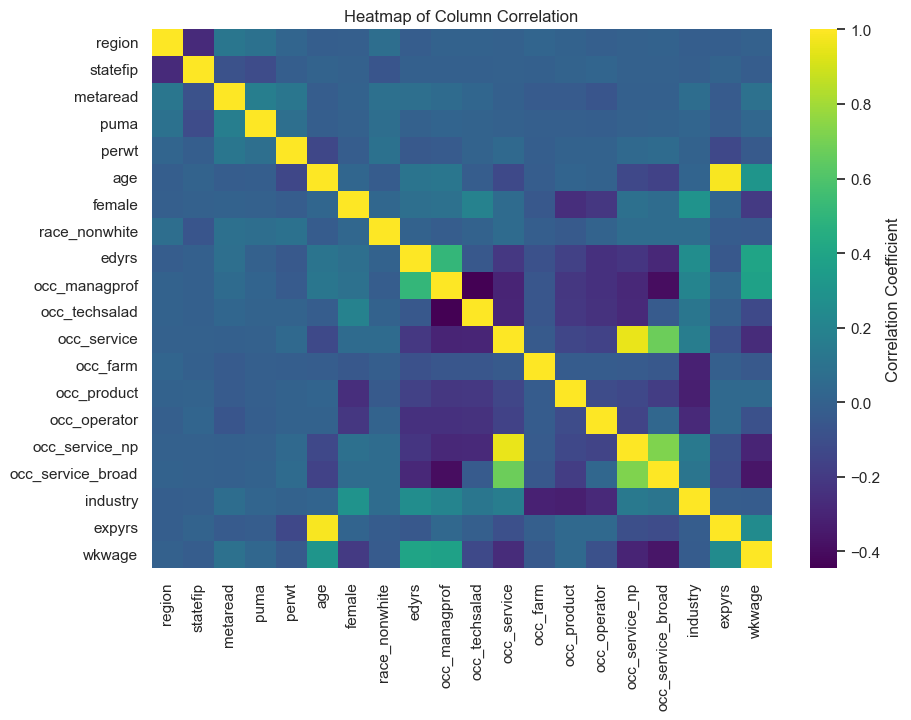

In [216]:
sns.set_theme(rc = {'figure.figsize':(10, 7)})
sns.heatmap(df.corr(), cmap='viridis', fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Heatmap of Column Correlation')
plt.show()

In [217]:
df = df.drop(columns=['region', 'statefip', 'race_nonwhite', 'puma', 'occ_farm', 'occ_product', 'industry'])

Handling Non-linearity

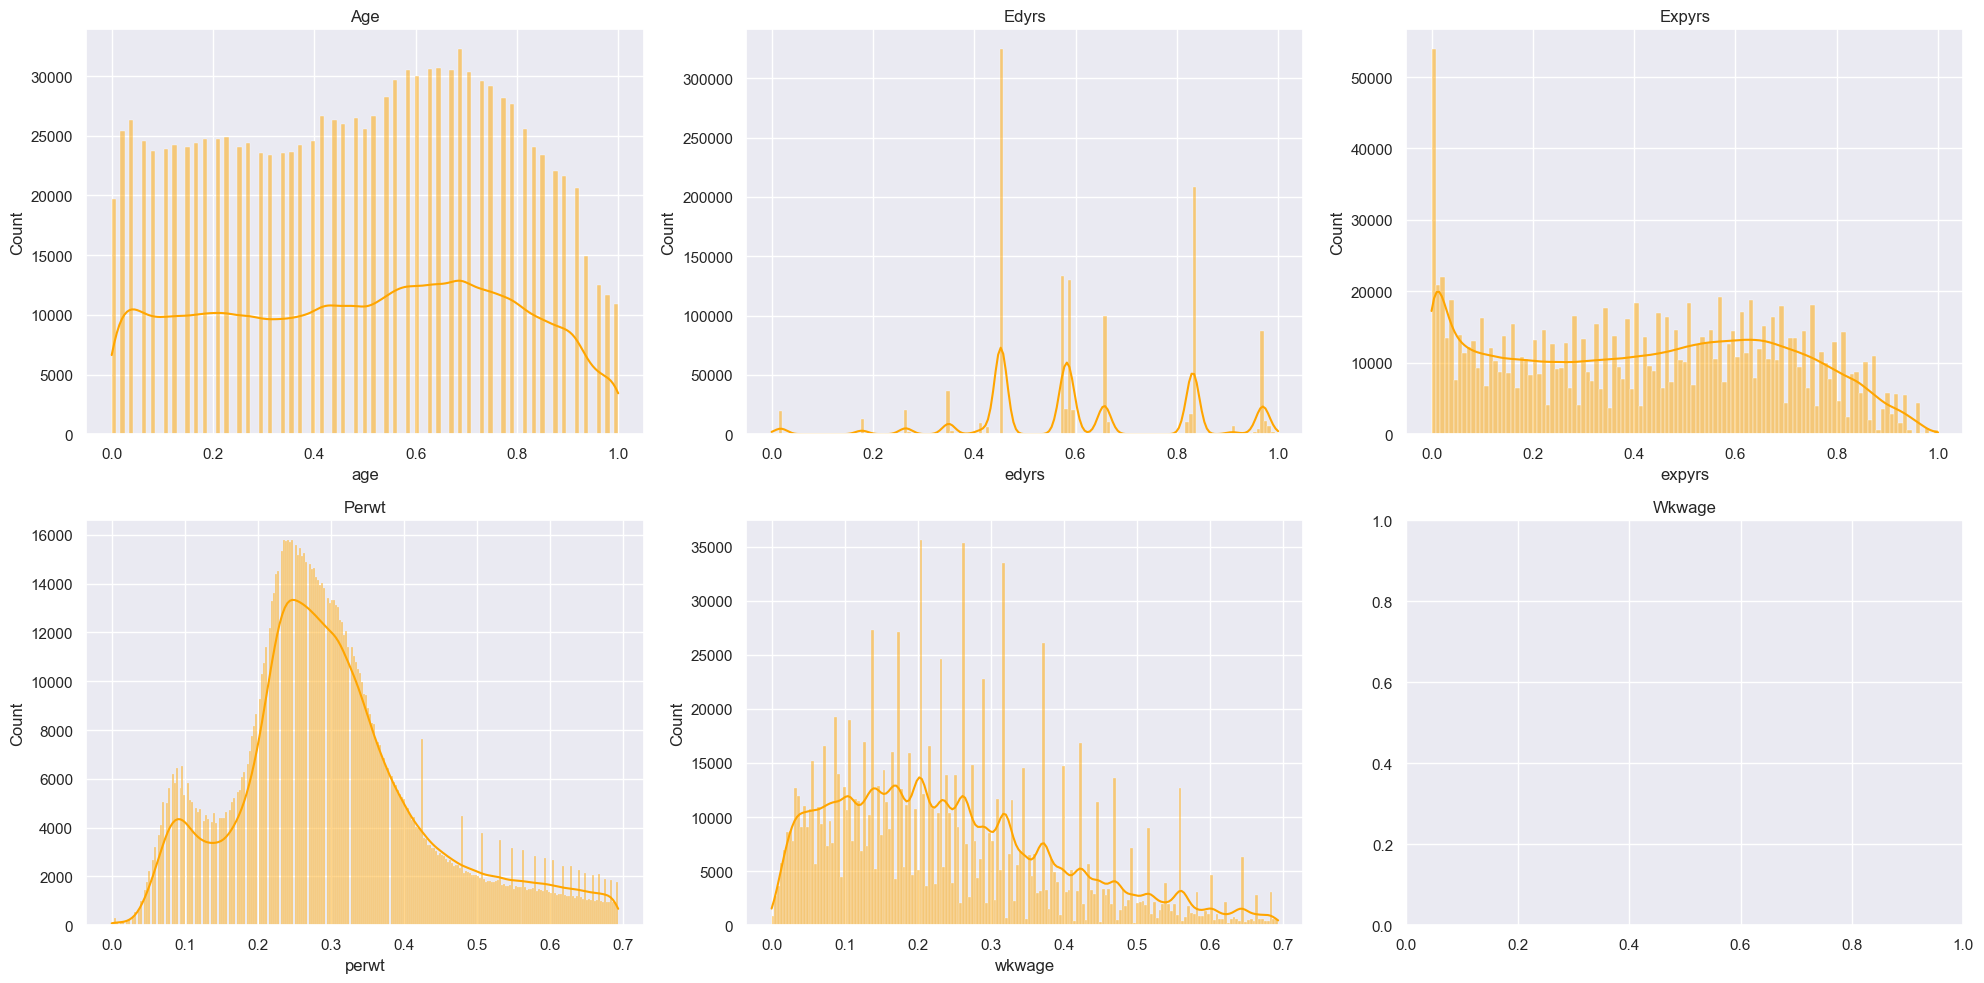

In [218]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))


sns.histplot(x=df['age'], ax=axes[0, 0], color='orange', kde=True)
axes[0, 0].set_title('Age')

sns.histplot(x=df['edyrs'], ax=axes[0, 1], color='orange', kde=True)
axes[0, 1].set_title('Edyrs')


sns.histplot(x=df['expyrs'], ax=axes[0, 2], color='orange', kde=True)
axes[0, 2].set_title('Expyrs')

sns.histplot(x=df['perwt'], ax=axes[1, 0], color='orange', kde=True)
axes[1, 0].set_title('Perwt')

sns.histplot(x='wkwage', data=df, ax=axes[1, 1], color='orange', kde=True)
axes[1, 2].set_title('Wkwage')


plt.tight_layout()
plt.show()

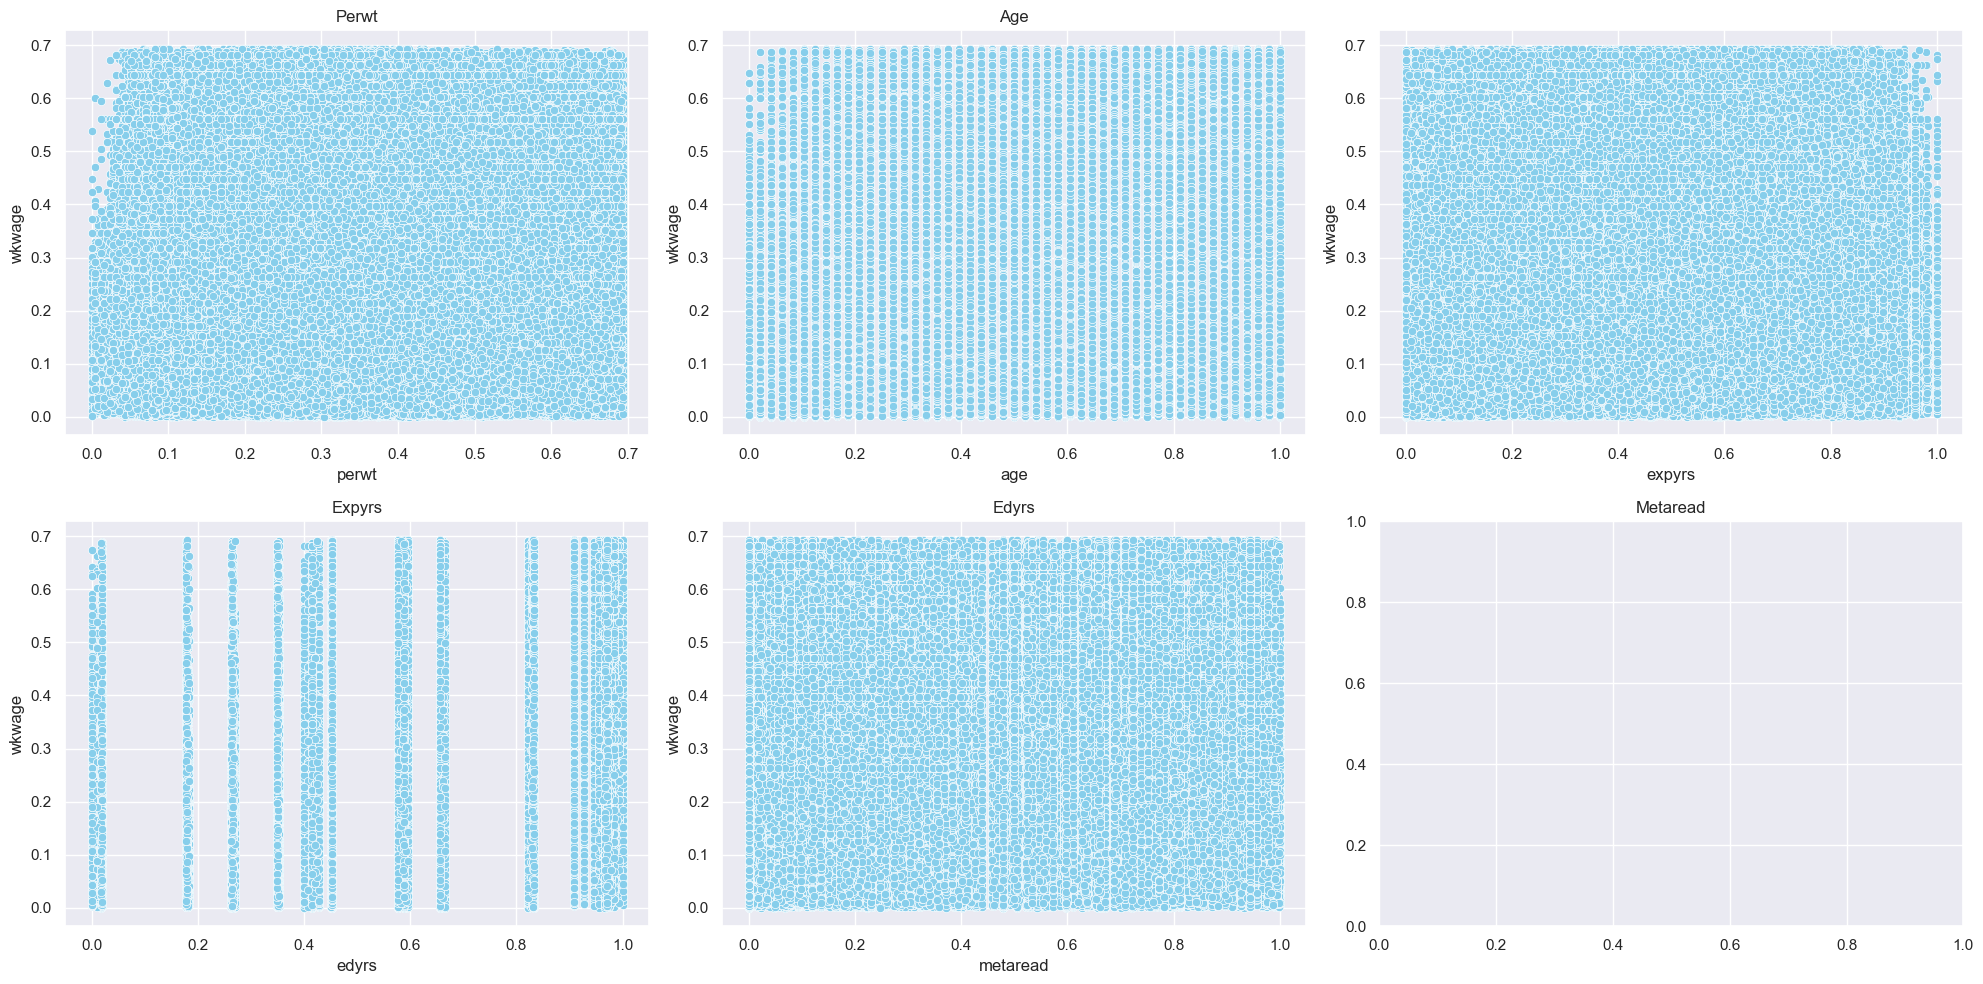

In [234]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))


sns.scatterplot(x=df['perwt'], y = df['wkwage'], ax=axes[0,0], color='skyblue')
axes[0, 0].set_title('Perwt')

sns.scatterplot(x='age', data=df,y = df['wkwage'], ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title('Age')

sns.scatterplot(x=df['expyrs'], y = df['wkwage'], ax=axes[0, 2], color='skyblue')
axes[1, 0].set_title('Expyrs')

sns.scatterplot(x=df['edyrs'], y = df['wkwage'], ax=axes[1, 0], color='skyblue')
axes[1, 1].set_title('Edyrs')

sns.scatterplot(x=df['metaread'], y = df['wkwage'], ax=axes[1, 1], color='skyblue')
axes[1, 2 ].set_title('Metaread')

plt.tight_layout()

plt.show()

Model 1

In [220]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.api as sm

X = df
X = X.drop(columns=['wkwage'])
y = df[['wkwage']]

ols_model = sm.OLS(y, X).fit()

print("MSE ", np.mean(ols_model.resid ** 2))
print(ols_model.summary())

MSE  0.015029629966517903
                                 OLS Regression Results                                
Dep. Variable:                 wkwage   R-squared (uncentered):                   0.815
Model:                            OLS   Adj. R-squared (uncentered):              0.815
Method:                 Least Squares   F-statistic:                          4.450e+05
Date:                Wed, 20 Mar 2024   Prob (F-statistic):                        0.00
Time:                        01:15:00   Log-Likelihood:                      8.2570e+05
No. Observations:             1214397   AIC:                                 -1.651e+06
Df Residuals:                 1214385   BIC:                                 -1.651e+06
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
--------

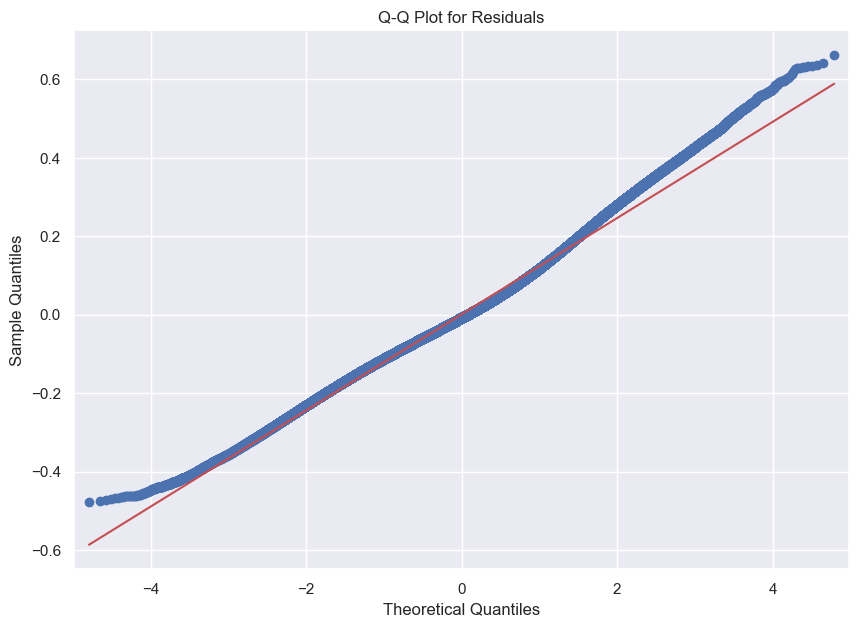

In [221]:
sm.qqplot(ols_model.resid, line='s')
plt.title('Q-Q Plot for Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

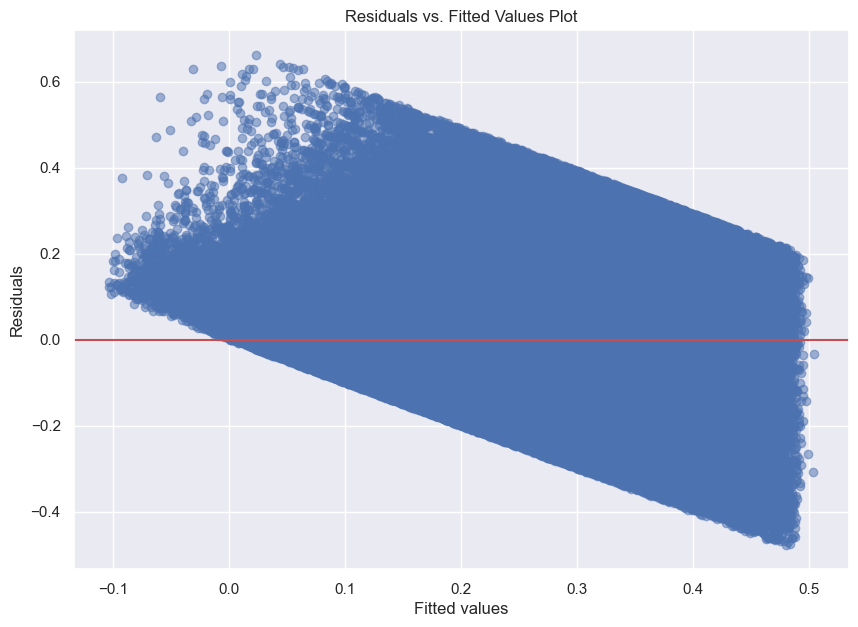

In [222]:
plt.scatter(ols_model.fittedvalues, ols_model.resid, alpha=0.5)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values Plot")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

Model 2

In [223]:
from statsmodels.stats.outliers_influence import OLSInfluence

influence = OLSInfluence(ols_model)

cook_distances = influence.cooks_distance[0]
threshold = 4 * np.mean(cook_distances)
influential_points = df[cook_distances > threshold]
cleaned_df = df[cook_distances <= threshold]


X = cleaned_df
X = X.drop(columns=['wkwage'])
y = cleaned_df[['wkwage']]

ols_model = sm.OLS(y, X).fit()

print("MSE ", np.mean(ols_model.resid ** 2))
print(ols_model.summary())


MSE  0.01140521396323357
                                 OLS Regression Results                                
Dep. Variable:                 wkwage   R-squared (uncentered):                   0.848
Model:                            OLS   Adj. R-squared (uncentered):              0.848
Method:                 Least Squares   F-statistic:                          5.359e+05
Date:                Wed, 20 Mar 2024   Prob (F-statistic):                        0.00
Time:                        01:15:02   Log-Likelihood:                      9.4441e+05
No. Observations:             1154674   AIC:                                 -1.889e+06
Df Residuals:                 1154662   BIC:                                 -1.889e+06
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
---------

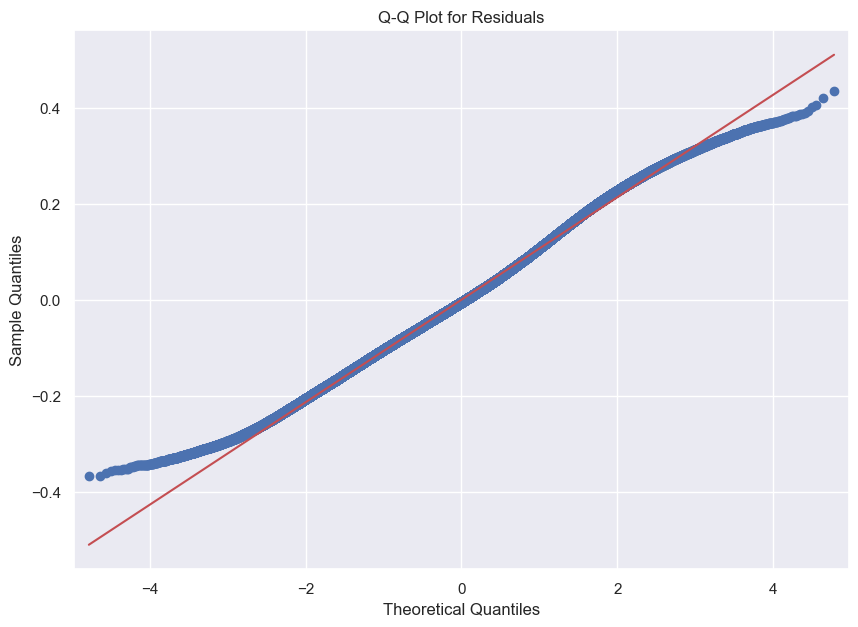

In [224]:
sm.qqplot(ols_model.resid, line='s')
plt.title('Q-Q Plot for Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

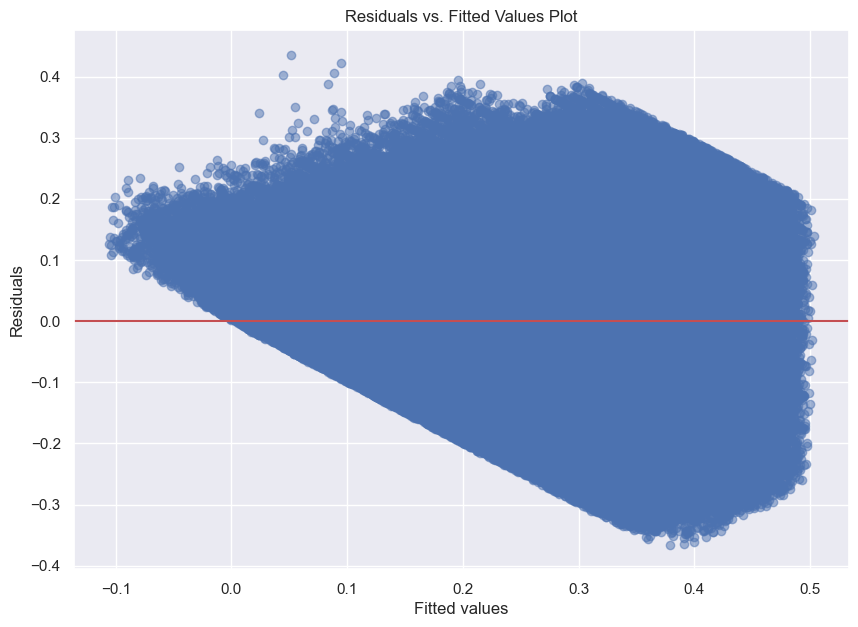

In [225]:
plt.scatter(ols_model.fittedvalues, ols_model.resid, alpha=0.5)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values Plot")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

Model 3

In [226]:
X = cleaned_df
X = X.drop(columns=['wkwage'])
y = np.sqrt(cleaned_df[['wkwage']])

ols_model = sm.OLS(y, X).fit()

print("MSE ", np.mean(ols_model.resid ** 2))
print(ols_model.summary())

MSE  0.014257911620102509
                                 OLS Regression Results                                
Dep. Variable:                 wkwage   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                          1.481e+06
Date:                Wed, 20 Mar 2024   Prob (F-statistic):                        0.00
Time:                        01:15:05   Log-Likelihood:                      8.1553e+05
No. Observations:             1154674   AIC:                                 -1.631e+06
Df Residuals:                 1154662   BIC:                                 -1.631e+06
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
--------

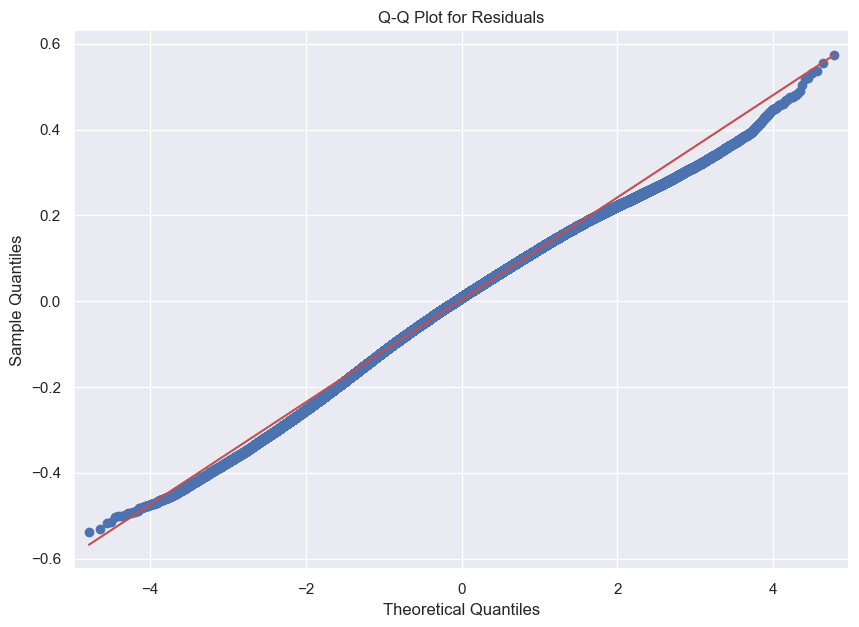

In [227]:
sm.qqplot(ols_model.resid, line='s')
plt.title('Q-Q Plot for Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

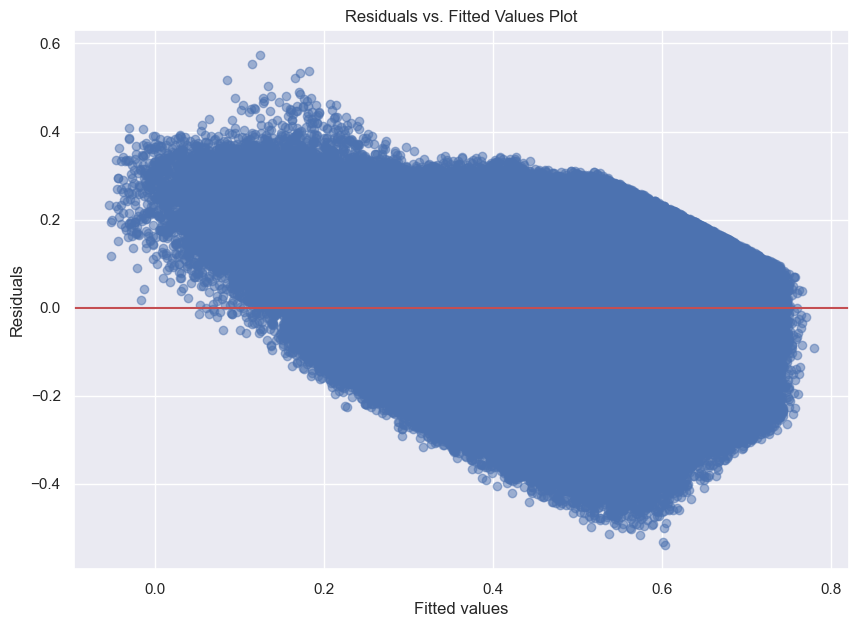

In [232]:
plt.scatter(ols_model.fittedvalues, ols_model.resid, alpha=0.5)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values Plot")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()